# Pandas Exploratory Data Analysis (EDA): Titanic

In [5]:
# Download data here:
# https://www.kaggle.com/c/titanic/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('train.csv')

In [4]:
## Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


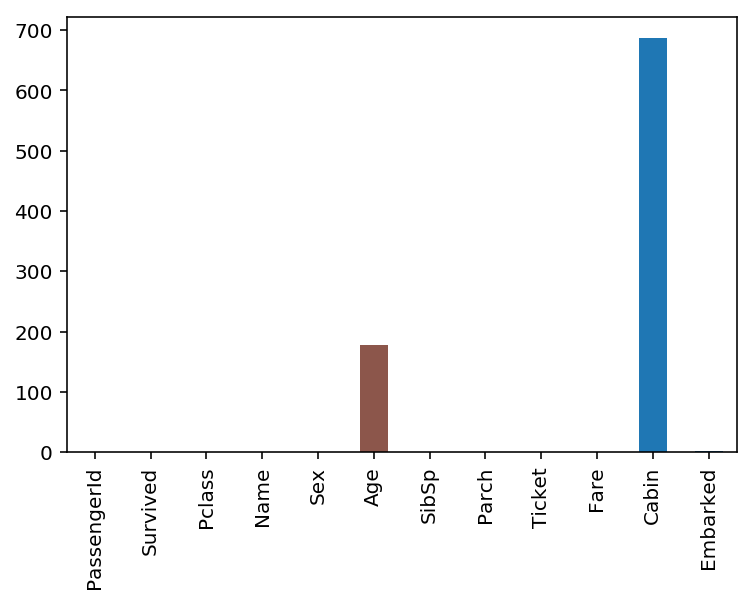

In [8]:
## Find Nulls

def look_at_nulls(df):
    nulls = df.isnull().sum()
    nulls.plot(kind='bar')
    print(nulls)
    
look_at_nulls(df)

#### Embarked has 2 nulls, since there was no Embarked data the validity of the row is in question, these rows can be dropped.


In [9]:
# Delete all rows where Embarked is empty
# First, check number of current rows
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
# Delete all rows where Embarked is empty
df.dropna(subset=['Embarked'], how='any', inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# Check number of current rows again, 2 removed.
df.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            712
SibSp          889
Parch          889
Ticket         889
Fare           889
Cabin          202
Embarked       889
dtype: int64

In [13]:
# Fill all empty cabins with ¯\(ツ)/¯ using the handy .fillna method
# Note: NaN, empty, and missing are synonymous.

In [14]:
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [17]:
# Did it work?
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [18]:
# Feature extraction

# There are two columns that pertain to how many family members are on the boat for a given person.
# Create a new column called FamilyCount which will be the sum of those two columns by simply adding two columns with a plus sign.

df['FamilyCount'] = df['SibSp'] + df['Parch']

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [20]:
# Perhaps holy people onboard were spared? 
# Reverends have a special title in their name. 
# Create a column called IsReverend: 
# 1 if they're a preacher, 0 if they're not.

In [21]:
# Let's look at only those on board with "Rev" in their name.
df[df['Name'].str.contains('Rev')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [22]:
# Everyone seems to fit. Create the new column called "IsReverend"
df['IsReverend'] = df['Name'].str.contains('Rev').astype(int)

In [23]:
df['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [24]:
# In order to feed our training data into a classification algorithm, 
# we need to convert our categories into 1's and 0's using Pandas pd.get_dummies

# Creating 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
# These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

embarked_dummies = pd.get_dummies(df[['Embarked']])

In [25]:
df = pd.concat([df, embarked_dummies], axis=1)

In [26]:
# Do the same thing for Sex
s_dummies = pd.get_dummies(df[['Sex']])

In [27]:
df = pd.concat([df, s_dummies], axis=1)

In [28]:
# Extract the title from everyone's name and create dummy columns
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [29]:
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']
df['Title'] = df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [30]:
# Different 'Titles' and their counts
df['Title'].value_counts()

Mr          518
Miss        179
Mrs         128
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Ms            1
Mlle          1
Capt          1
Mme           1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [31]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['Title']=df.apply(replace_titles, axis=1)

In [32]:
# Condensed Titles and their counts
df['Title'].value_counts()

Mr        531
Miss      181
Mrs       137
Master     40
Name: Title, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int32
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
Sex_female     889 non-null uint8
Sex_male       889 non-null uint8
Title          889 non-null object
dtypes: float64(2), int32(1), int64(6), object(6), uint8(5)
memory usage: 123.2+ KB


In [34]:
# Exploratory analysis
# What was the survival rate overall?
df[['Survived']].mean()

Survived    0.382452
dtype: float64

In [35]:
# Exploratory analysis
# Which gender fared the worst? What was their survival rate?
g1 = df.groupby("Sex").mean()[['Survived']]
g1

,Survived
Sex,
female,0.740385
male,0.188908


In [36]:
# Exploratory analysis
# What was the survival rate for each Pclass?
g2 = df.groupby("Pclass").mean()[['Survived']]
g2

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [37]:
# Exploratory analysis
# Did any reverends survive? How many?
g3 = df.groupby("IsReverend").mean()[['Survived']]
g3

,Survived
IsReverend,
0,0.385051
1,0.000000


In [38]:
# Exploratory analysis
# What was the survival rate of people without a cabin assignment?
df.groupby("Cabin").mean()[['Survived']].filter(like='¯\(ツ)/¯', axis=0)

,Survived
Cabin,
¯\(ツ)/¯,0.299854


In [39]:
df_age_nulls = df

In [40]:
# Exploratory analysis
# What is the survival rate for people whose Age is empty?

df_age_nulls['Age'].fillna('null')
df_age_nulls.groupby('Age').mean()[['Survived']].filter(like='null', axis=0)

,Survived
Age,


In [41]:
df_age_nulls['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilyCount      0
IsReverend       0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
Title            0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int32
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
Sex_female     889 non-null uint8
Sex_male       889 non-null uint8
Title          889 non-null object
dtypes: float64(2), int32(1), int64(6), object(6), uint8(5)
memory usage: 123.2+ KB


In [44]:
# Exploratory analysis
# What is the survival rate for each port of embarkation?
df.groupby('Embarked').mean()[['Survived']]

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [45]:
# Exploratory analysis
# What is the survival rate for children (under 12) in each Pclass?

df.loc[df['Age'] < 12, :].groupby('Pclass')[['Survived']].count()

,Survived
Pclass,
1,4
2,17
3,47


In [46]:
# # Step 4: Exploratory analysis
# Did the captain of the ship survive? Is he on the list?

df[df['Name'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,Mr



Captain Edward Crosby was not the captain, 
the captain was Edward Smith and he isn't on the list. Something about captains always going down with the ship comes to mind though.

In [50]:
# Exploratory analysis
# Of all the people that died, who had the most expensive ticket? How much did it cost?

df.loc[df['Survived']==0,['Name','Fare']].sort_values('Fare',ascending=False).iloc[0]

Name    Fortune, Mr. Charles Alexander
Fare                               263
Name: 27, dtype: object

In [51]:
# Exploratory analysis
# Does having family on the boat help or hurt your chances of survival?
df.groupby("FamilyCount").mean()[['Survived']]

,Survived
FamilyCount,
0,0.300935
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [ ]:
# Plotting
# Using Matplotlib and Seaborn to create several charts showing the survival rates of different groups of people. 

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title'],
      dtype='object')

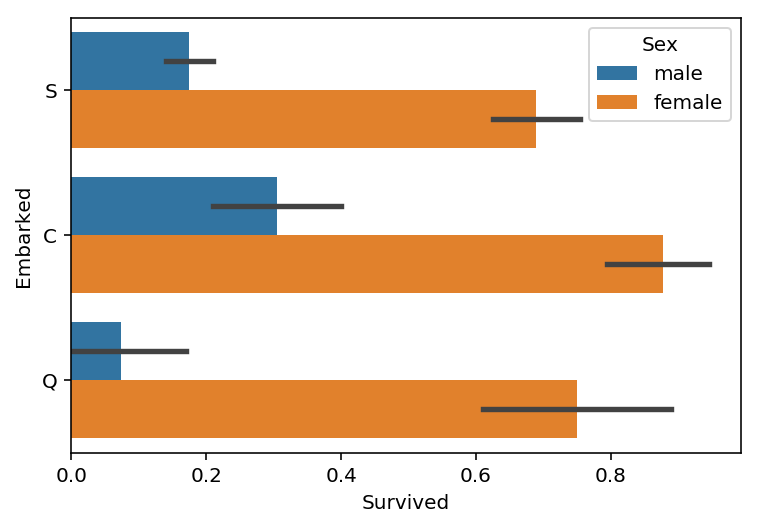

In [56]:
sns.barplot(x='Survived', y='Embarked', hue='Sex', data=df)

In [57]:
corr_df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title']].corr()

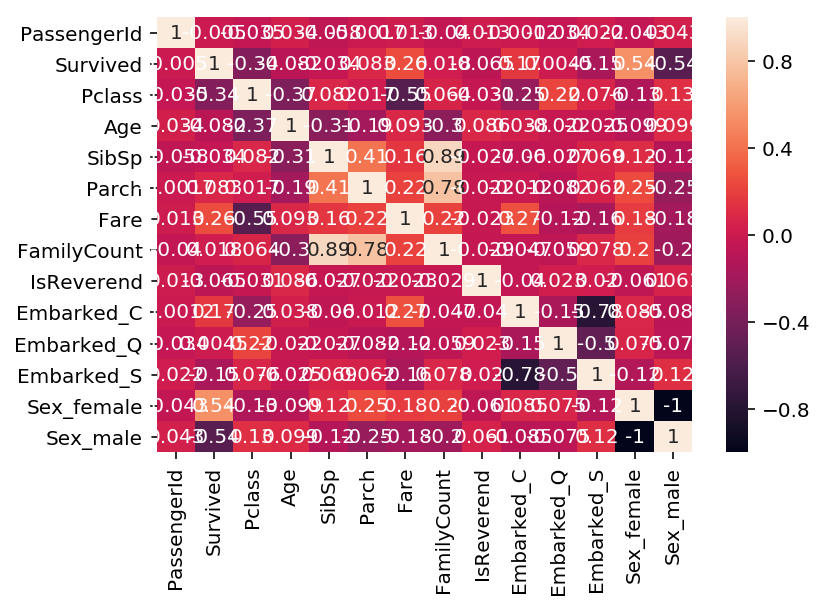

In [58]:
%config InlineBackend.figure_format = 'retina'
sns.heatmap(corr_df, annot=True)

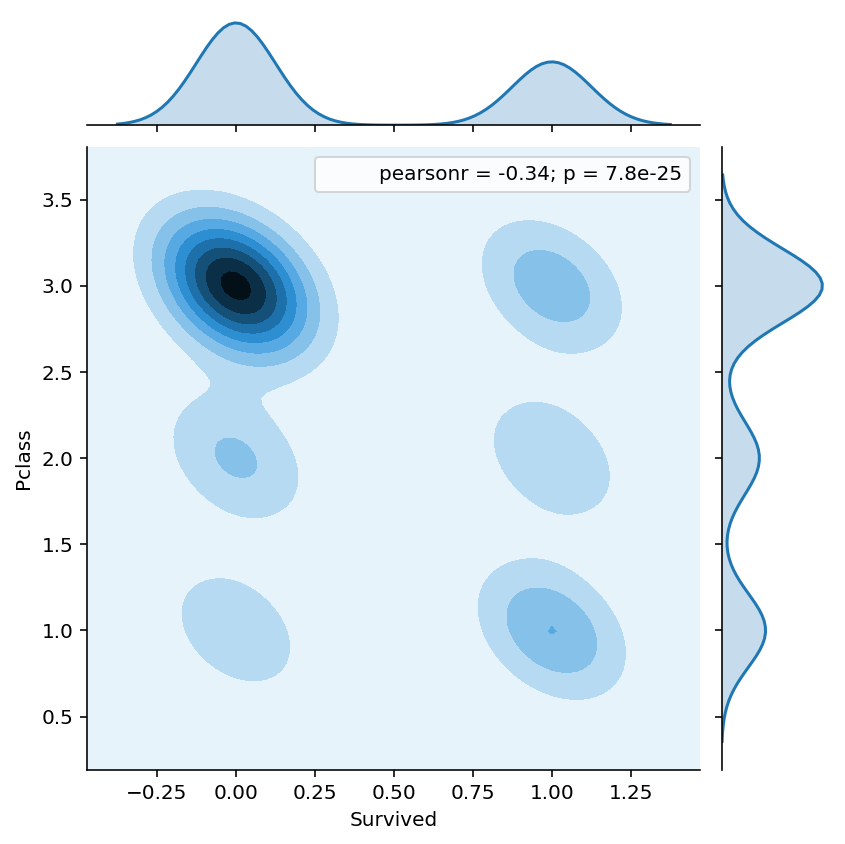

In [59]:
sns.jointplot(x='Survived', y='Pclass', data=df, kind='kde')

In [60]:
age_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['Age_Group'] = pd.cut(df["Age"], range(0, 91, 10), right=False, labels=age_label)

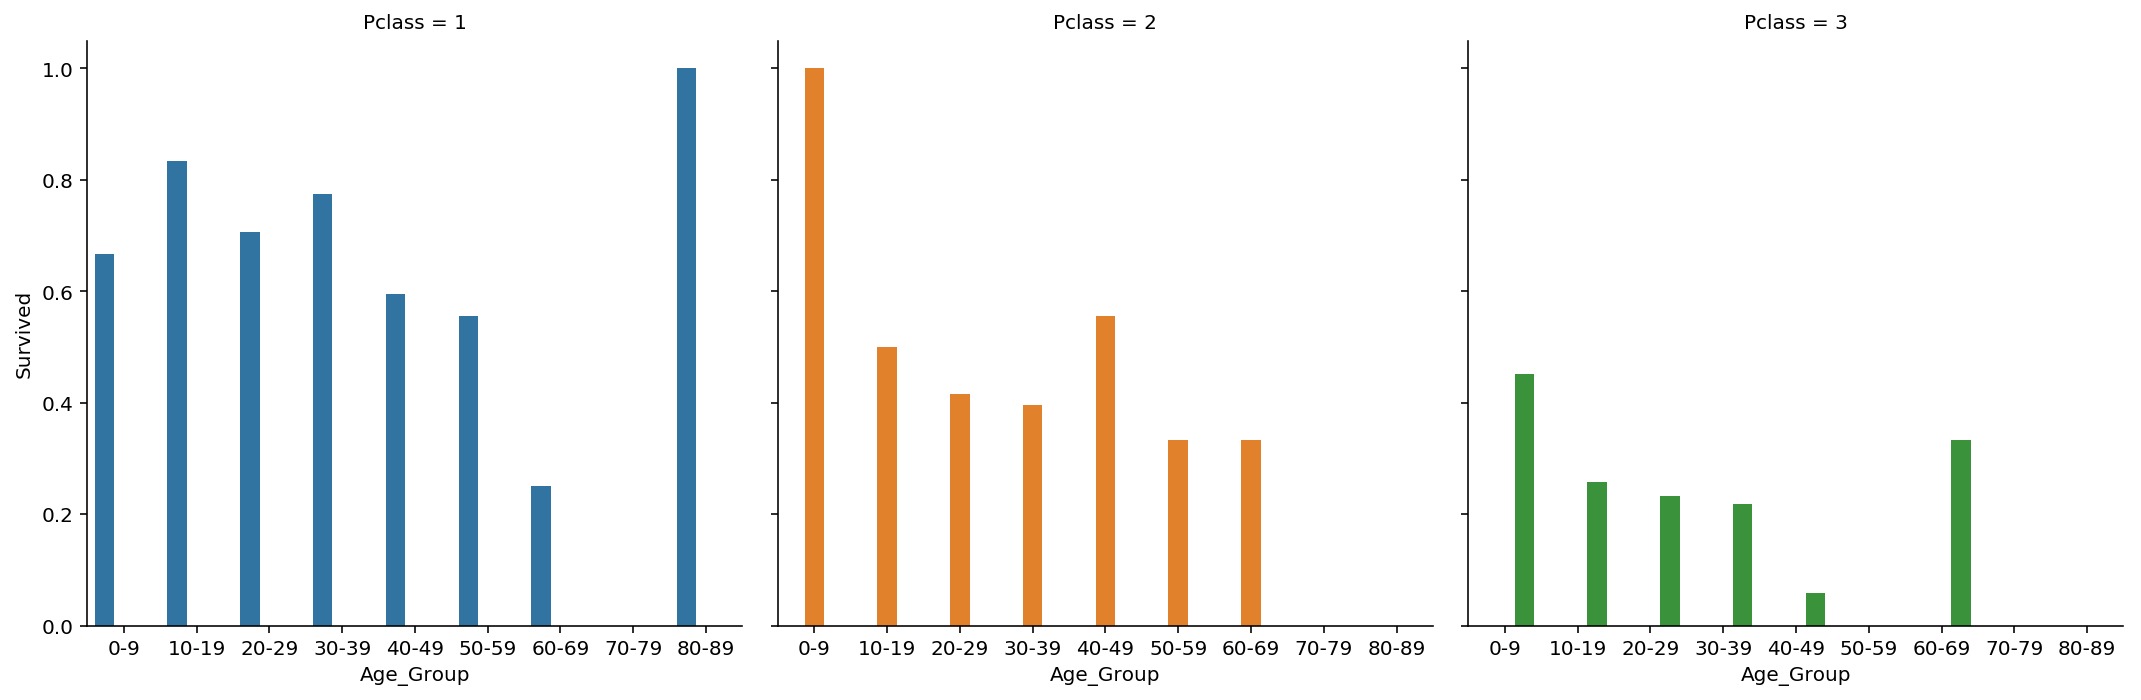

In [61]:
age_group_class = sns.factorplot(x='Age_Group', y='Survived', hue='Pclass', col = 'Pclass', 
                                 data=df, kind='bar', size=5, aspect=1, capsize=0.2, ci=None)

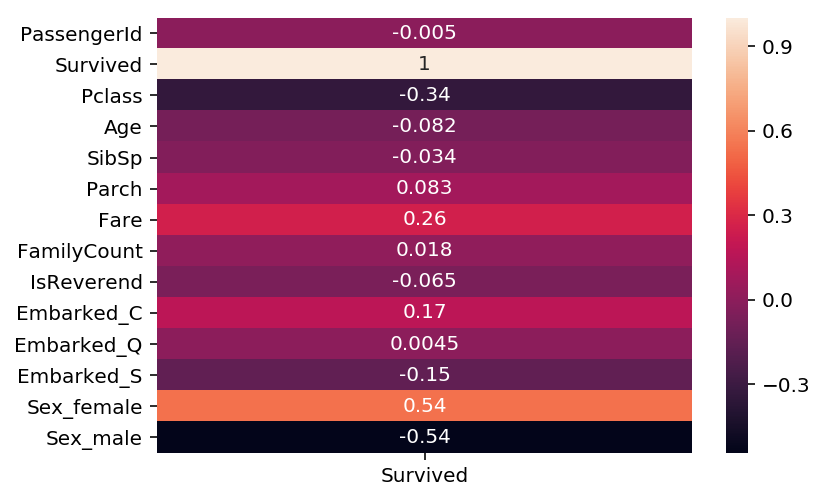

In [62]:
sns.heatmap(df.corr()['Survived'].to_frame(), annot=True)

In [63]:
#Add 'HasFamily' column to compare survival rate with having family or not having family (binary)
df['HasFamily'] = df['FamilyCount'].map(lambda x: 0 if x == 0 else 1)

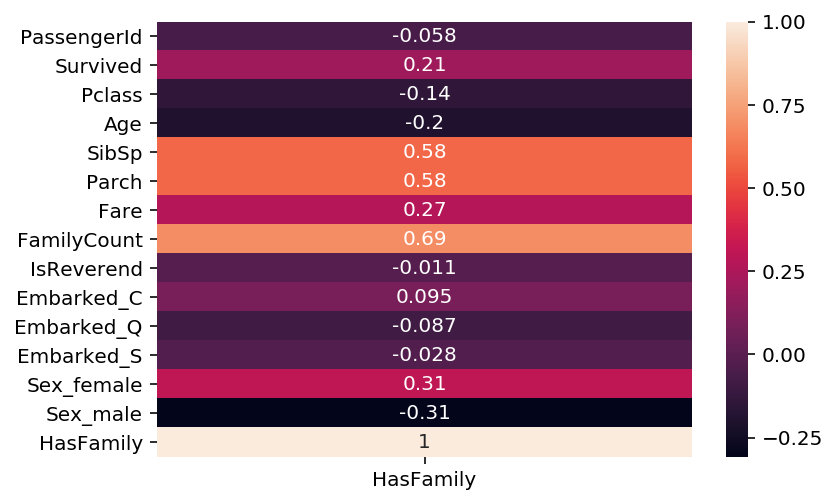

In [64]:
sns.heatmap(df.corr()['HasFamily'].to_frame(), annot=True)

/home/pi/.venv/jns/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


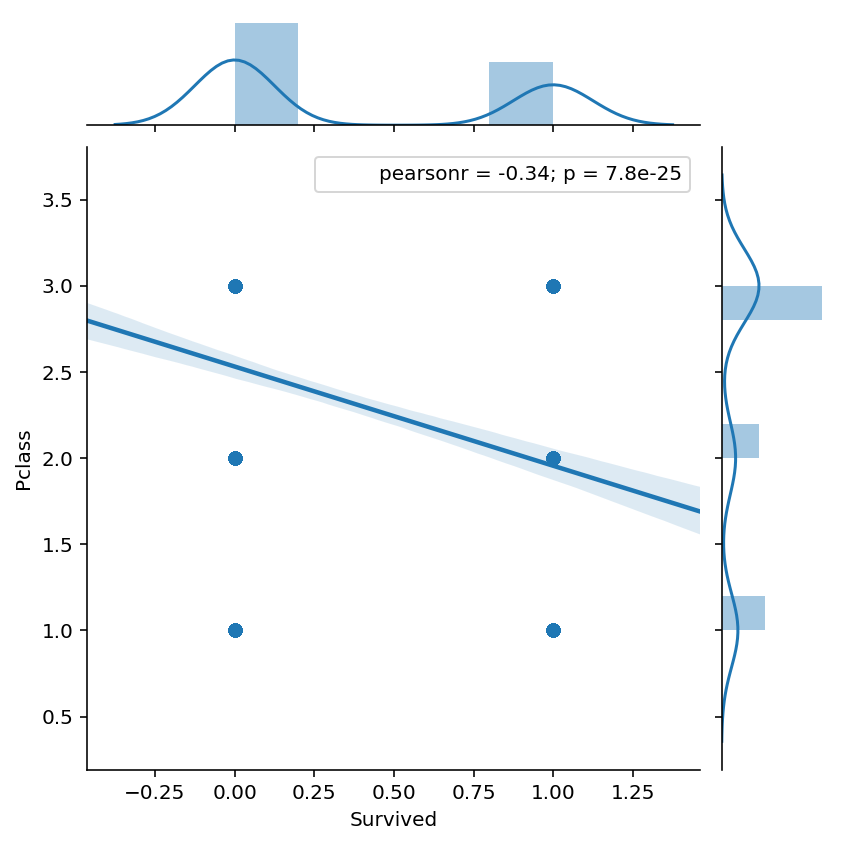

In [65]:
sns.jointplot(x='Survived', y='Pclass', data=df,kind="reg")

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title', 'Age_Group', 'HasFamily'],
      dtype='object')

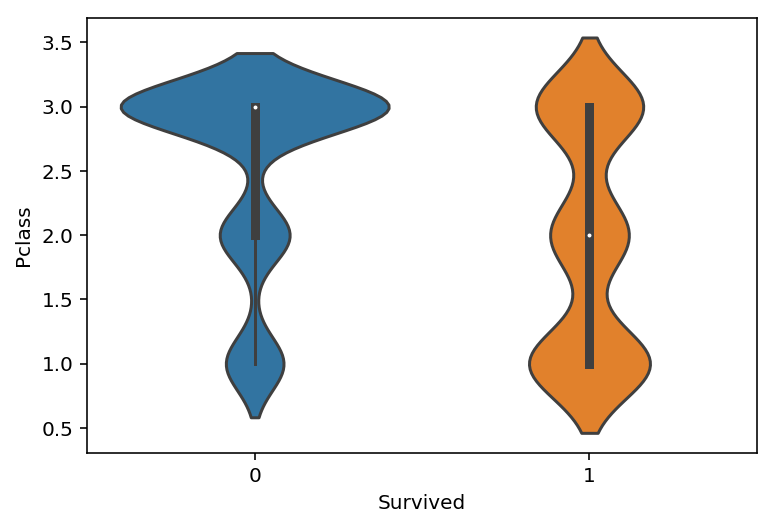

In [67]:
sns.violinplot(x='Survived', y='Pclass', data=df)

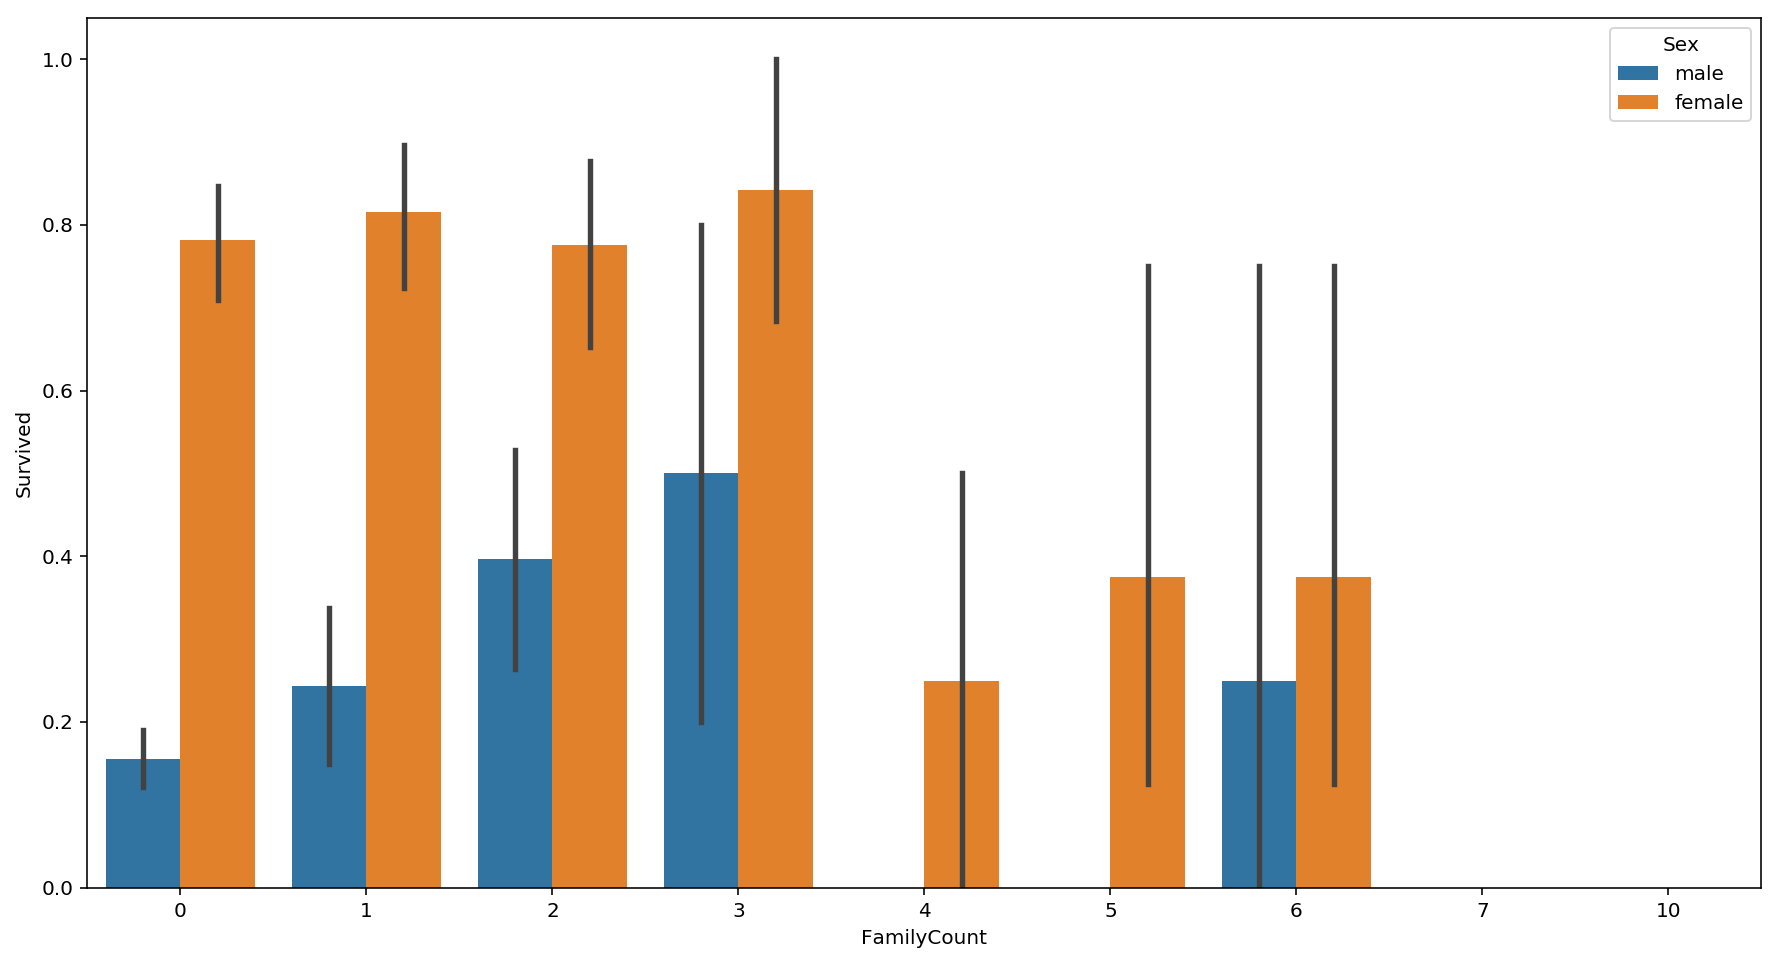

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x="FamilyCount", y="Survived", hue="Sex", data=df)

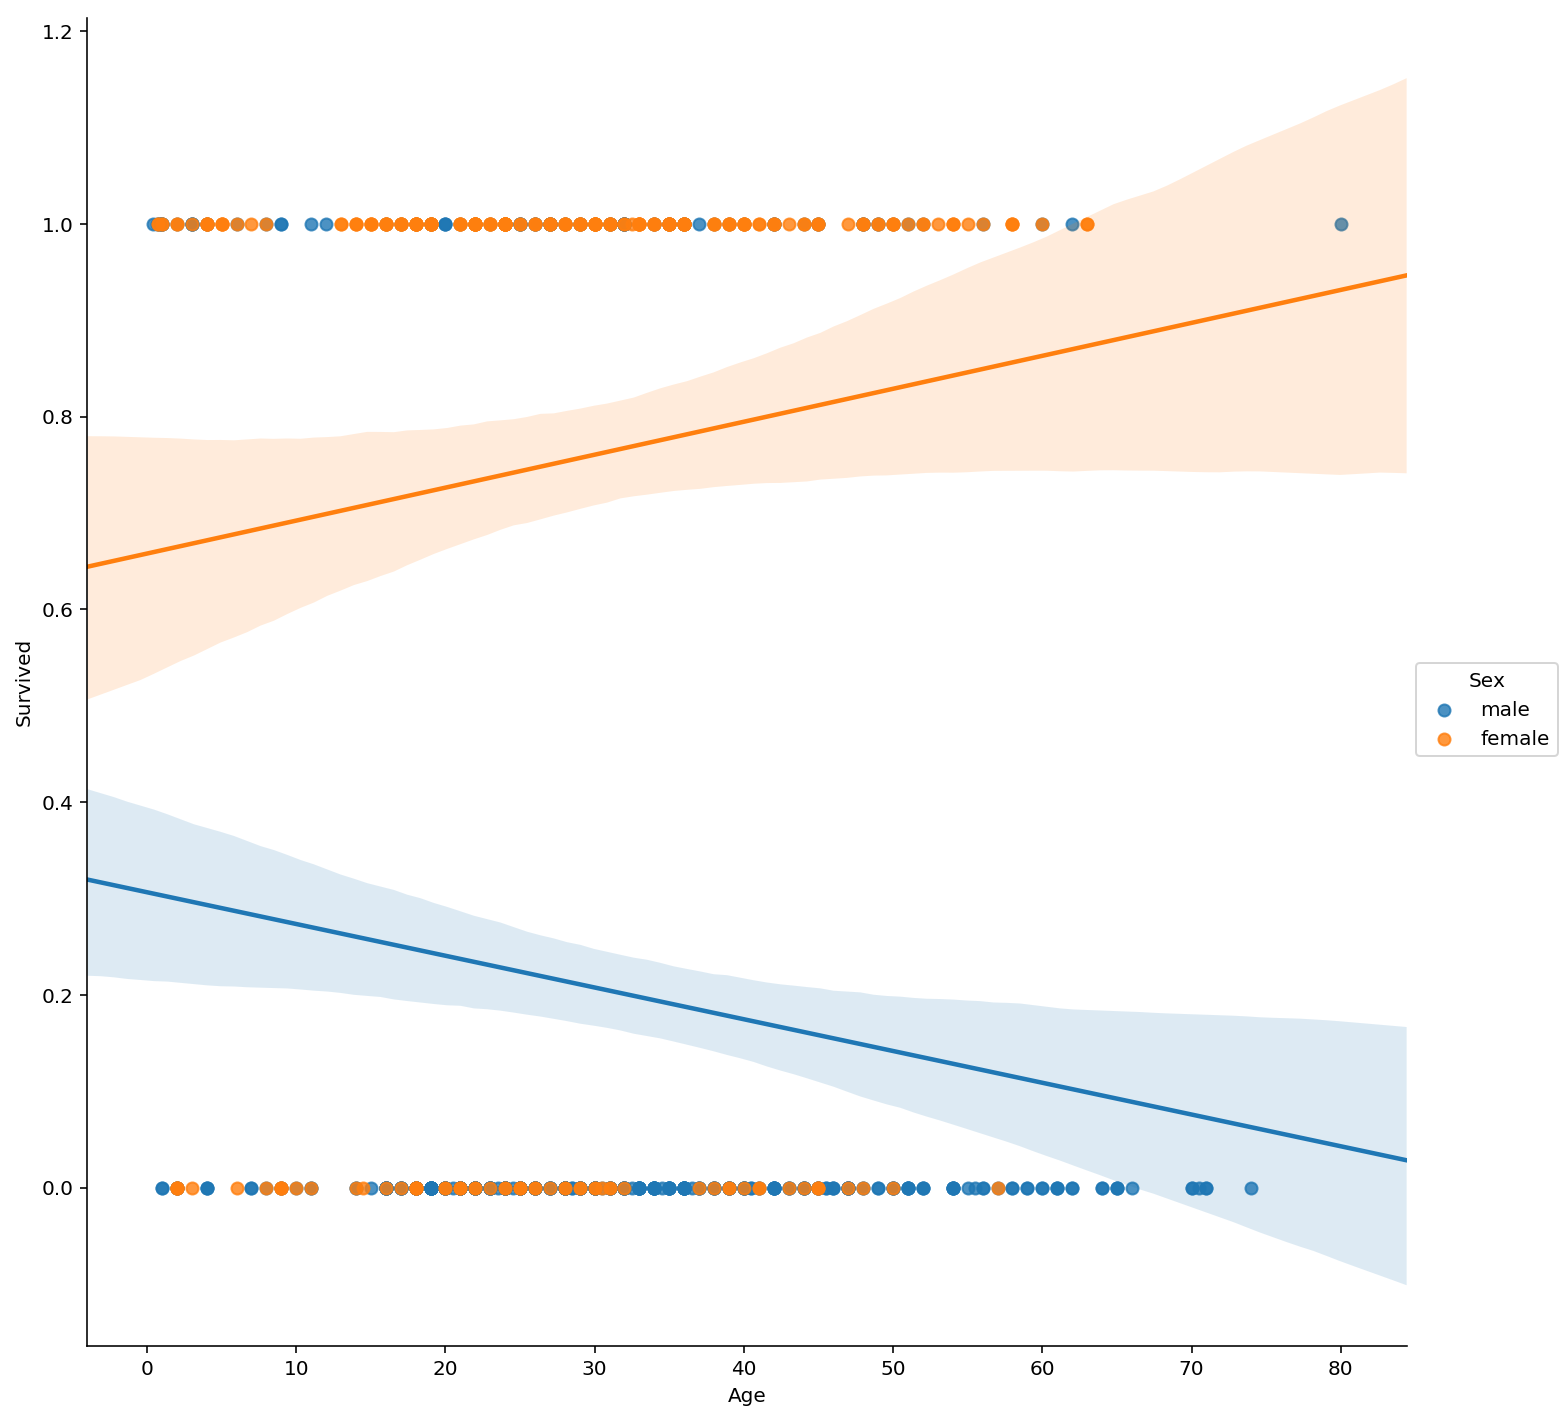

In [69]:
sns.lmplot('Age', 'Survived', data=df, hue='Sex', size=10)

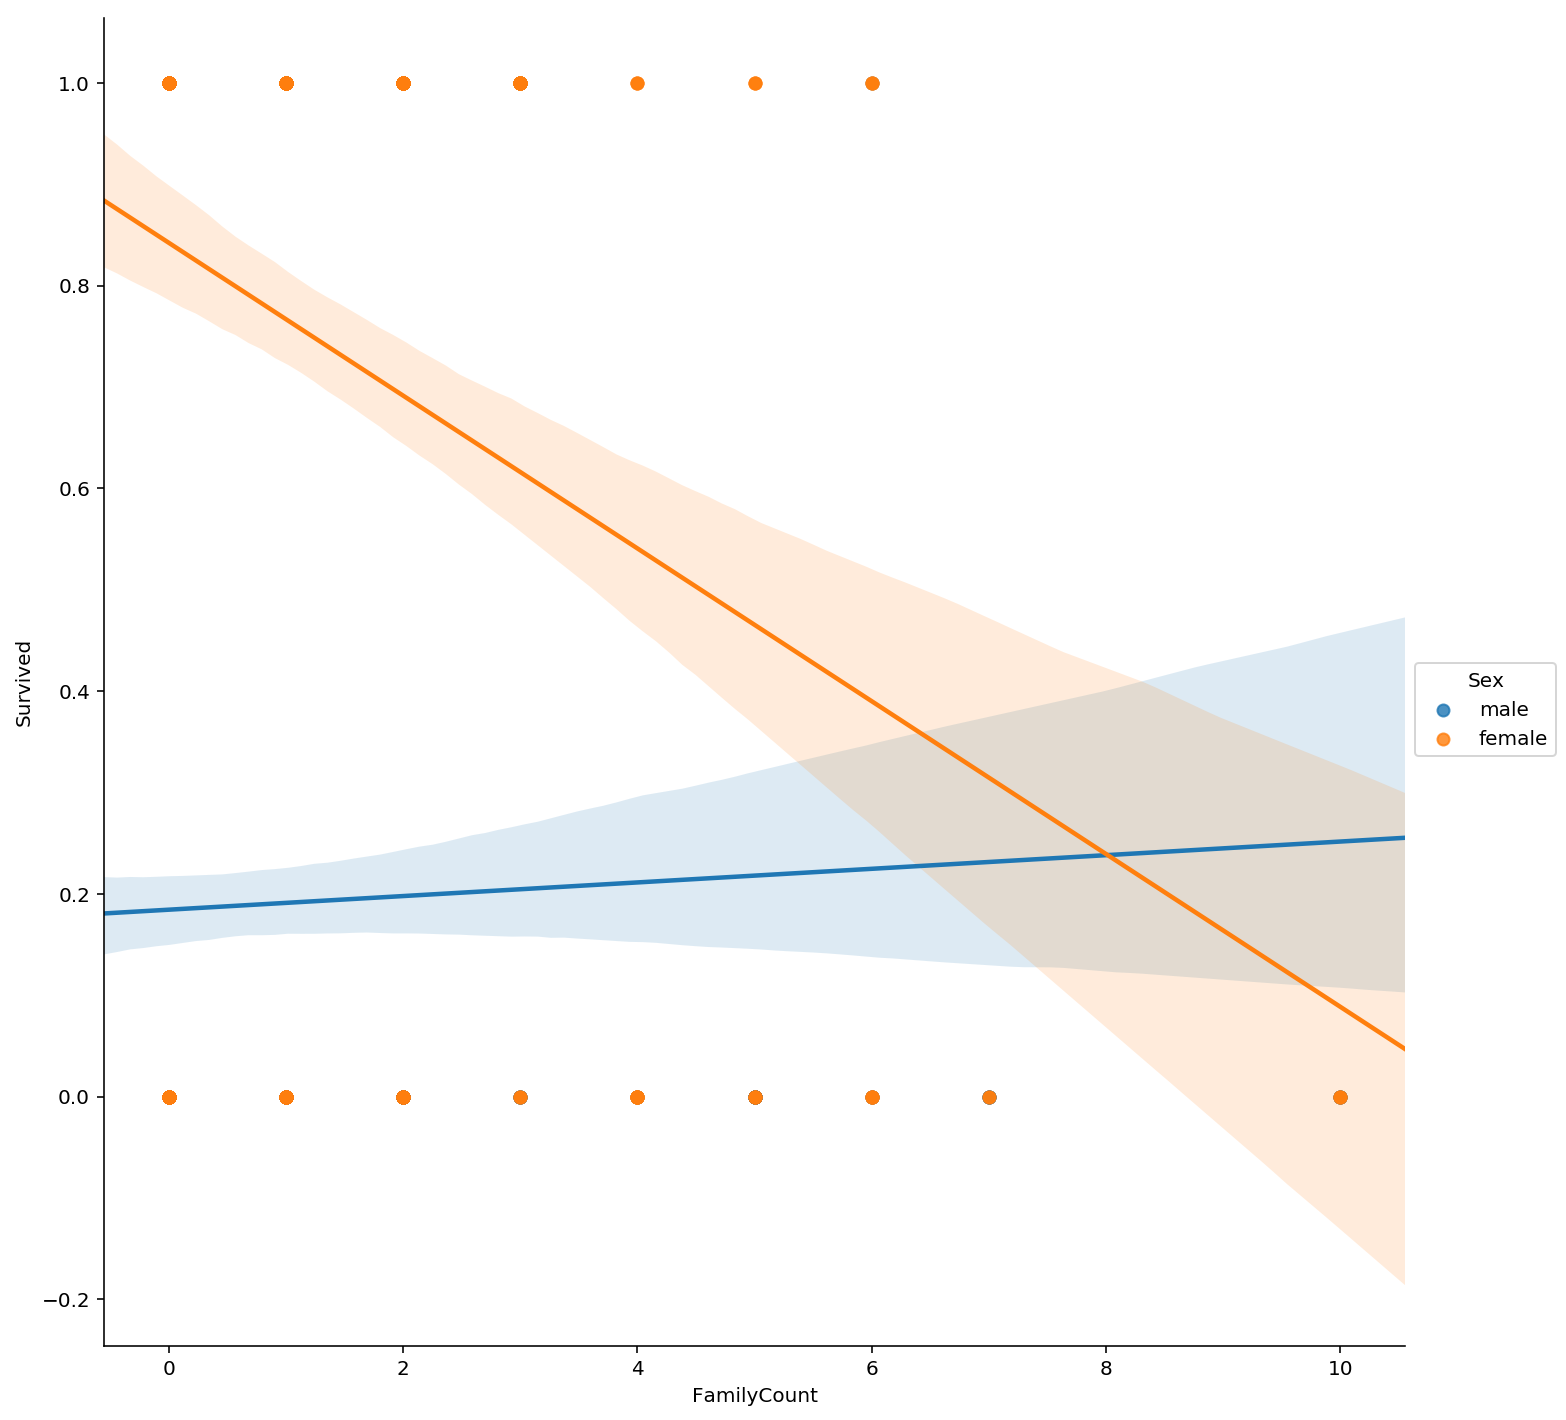

In [70]:
sns.lmplot('FamilyCount', 'Survived', data=df, hue='Sex', size=10)

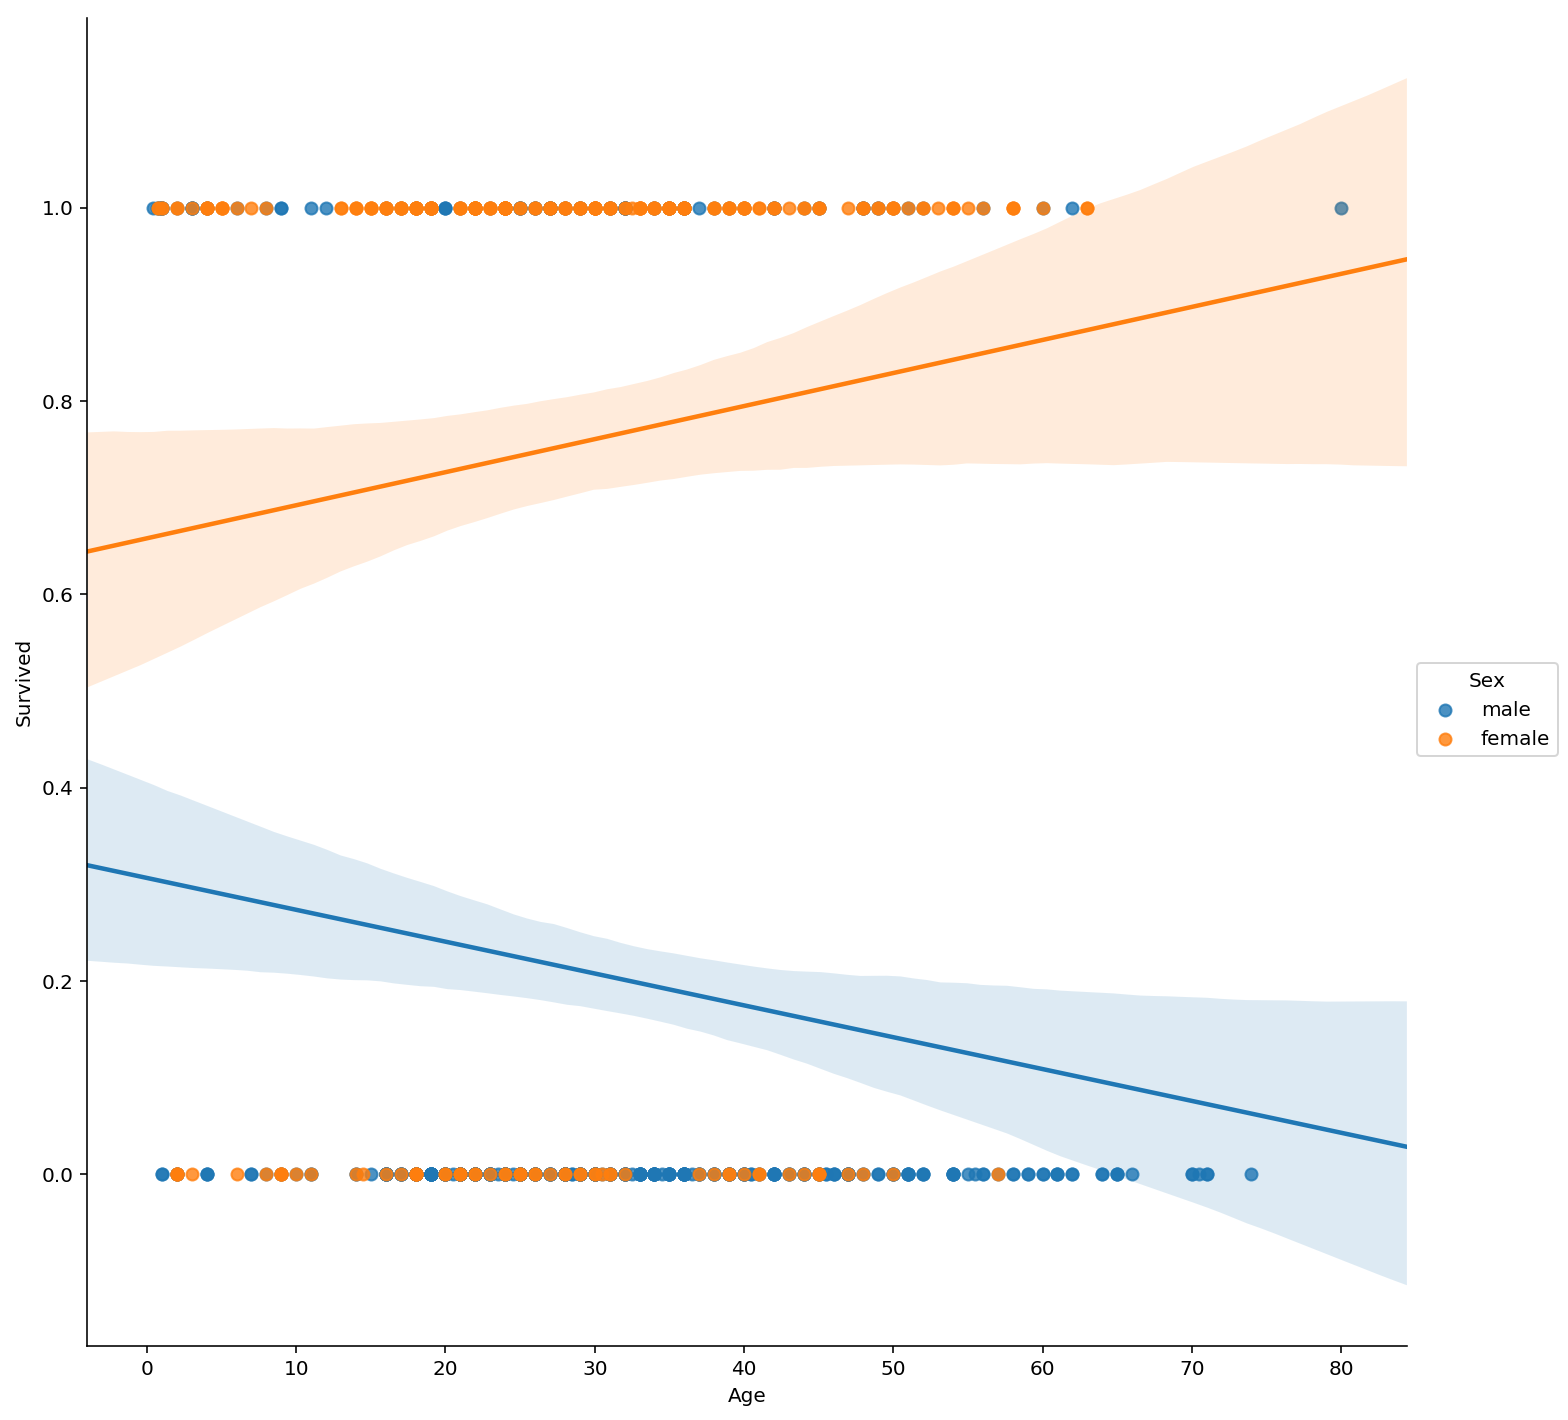

In [71]:
sns.lmplot('Age', 'Survived', data=df, hue='Sex', size=10)

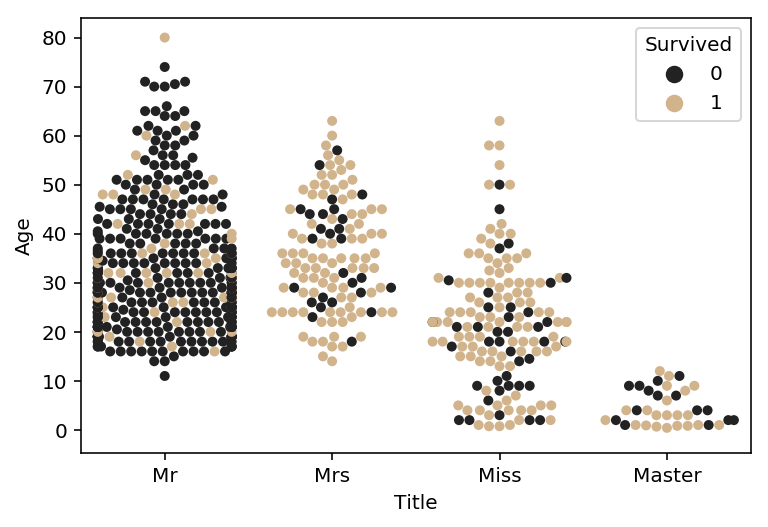

In [76]:
#raw_titanic['Title'] = titanic['Name'].apply(get_title)
sns.swarmplot(x = 'Title', y = 'Age', data = df, hue = 'Survived', color = "tan",)

I beleive this to be the best visualization of the the correlation between age, sex and survival. You can easily see that the majority of females survived regardless of marital status or age and that males simply died. Thier best hope was to have a family, or be a child under 12.